## Load the Data

In [2]:
import pyarrow.parquet as pq
import pandas as pd
file1 = pq.read_table('yellow_tripdata_2023-01.parquet')
file2 = pq.read_table('yellow_tripdata_2023-03.parquet')
file3 = pq.read_table('yellow_tripdata_2023-06.parquet')


df1 = file1.to_pandas()
df2 = file2.to_pandas()
df3 = file3.to_pandas()

df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)
df3=pd.DataFrame(df3)

df1['Month']='Jan'
df2['Month']='Mar'
df3['Month']='Jun'

df1.rename(columns={'VendorID':'VendorID',
                         'tpep_pickup_datetime':'datetime_pickup',
                         'tpep_dropoff_datetime':'datetime_dropoff',
                         'airport_fee':'airport_fee'}, inplace=True)
df2.rename(columns={'VendorID':'VendorID',
                         'tpep_pickup_datetime':'datetime_pickup',
                         'tpep_dropoff_datetime':'datetime_dropoff',
                         'Airport_fee':'airport_fee'
                        },inplace=True)
df3.rename(columns={'VendorID':'VendorID',
                         'tpep_pickup_datetime':'datetime_pickup',
                         'tpep_dropoff_datetime':'datetime_dropoff',
                         'Airport_fee':'airport_fee'
                        }, inplace=True)

In [3]:
df=pd.concat([df1,df2,df3], axis=0)
month_order = ['Jan', 'Mar', 'Jun']

# Correction & Data Adding:
df['total_amount'] = df['total_amount'].abs() #make sure there's no negative value
df['tip_amount'] = df['tip_amount'].abs()
df['fare_amount'] = df['fare_amount'].abs()
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True) # sort the data of month in categorical value
df.reset_index(drop=True, inplace=True)
df['payment_type'] = df['payment_type'] + 1 # adding +1 to payment_type due to data mismatch
df=df[df['VendorID']!=6] #excluding data of VendorID=6

#Display data
df.head()

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,3,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Jan
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,2,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Jan
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,2,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Jan
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,2,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,Jan
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,2,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Jan


## Three months of data comparition and discuss the trends in it.

<function matplotlib.pyplot.show(close=None, block=None)>

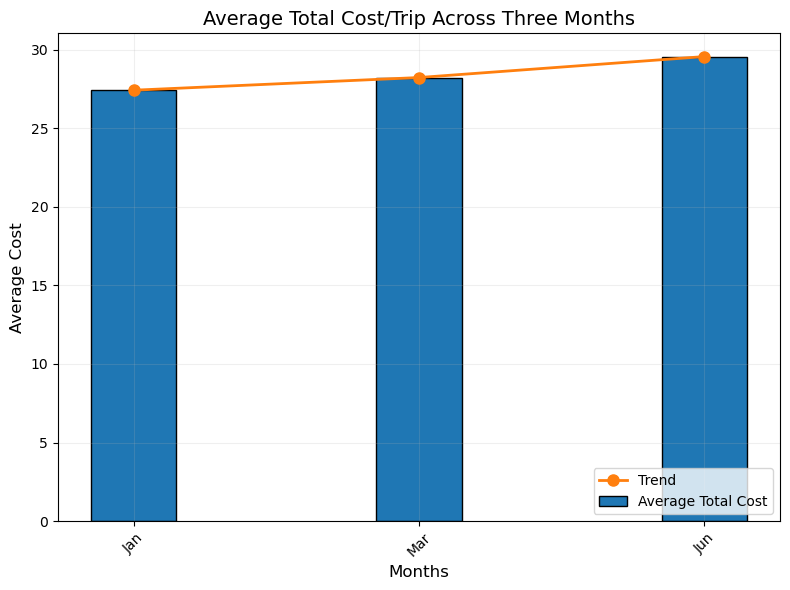

In [4]:
import matplotlib.pyplot as plt

# Comparing the total per ride cost between months
avg_fare_month = df.groupby('Month')['total_amount'].mean()
months=avg_fare_month.index
value_1=avg_fare_month.values


plt.figure(figsize=(8,6))
plt.bar(months,value_1, color='#1f77b4', edgecolor='black',label="Average Total Cost",width=0.3)
plt.plot(months, value_1, marker='o', color='#ff7f0e',linewidth=2,markersize=8, linestyle='-',label='Trend')

plt.xlabel('Months',fontsize=12)
plt.ylabel('Average Cost',fontsize=12)
plt.title('Average Total Cost/Trip Across Three Months', fontsize=14)

plt.grid(True, linestyle='-',alpha=0.2)
plt.xticks(rotation=45)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

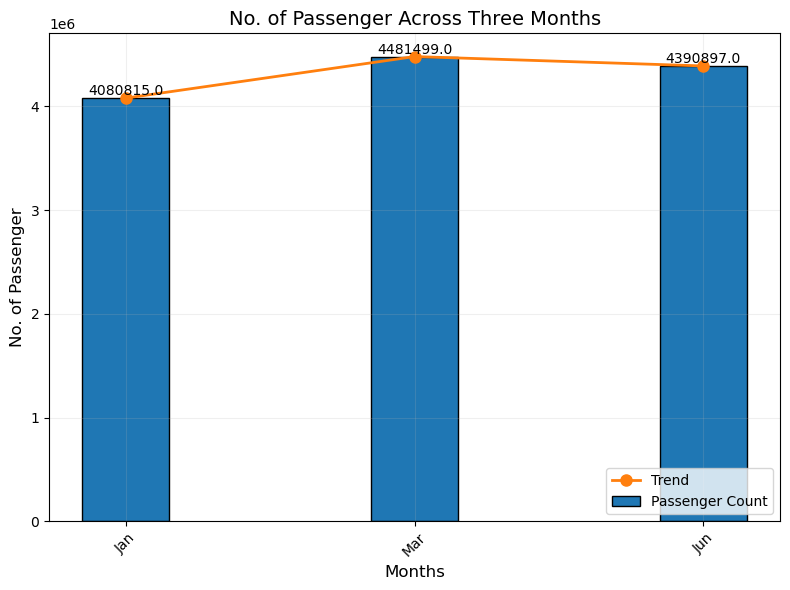

In [5]:
# No of passenger between months
pass_count = df.groupby('Month')['passenger_count'].sum()
months=pass_count.index
value_2=pass_count.values

plt.figure(figsize=(8,6))
bars = plt.bar(months, value_2, color='#1f77b4', edgecolor='black', label='Passenger Count', width=0.3)

# Displaying values on top of bars
for bar, value in zip(bars, value_2):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(value), ha='center', va='bottom', color='black', fontsize=10)
    
plt.plot(months, value_2, marker='o', color='#ff7f0e',linewidth=2,markersize=8, linestyle='-',label='Trend')


plt.xlabel('Months',fontsize=12)
plt.ylabel('No. of Passenger',fontsize=12)
plt.title('No. of Passenger Across Three Months', fontsize=14)

plt.grid(True, linestyle='-',alpha=0.2)
plt.xticks(rotation=45)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

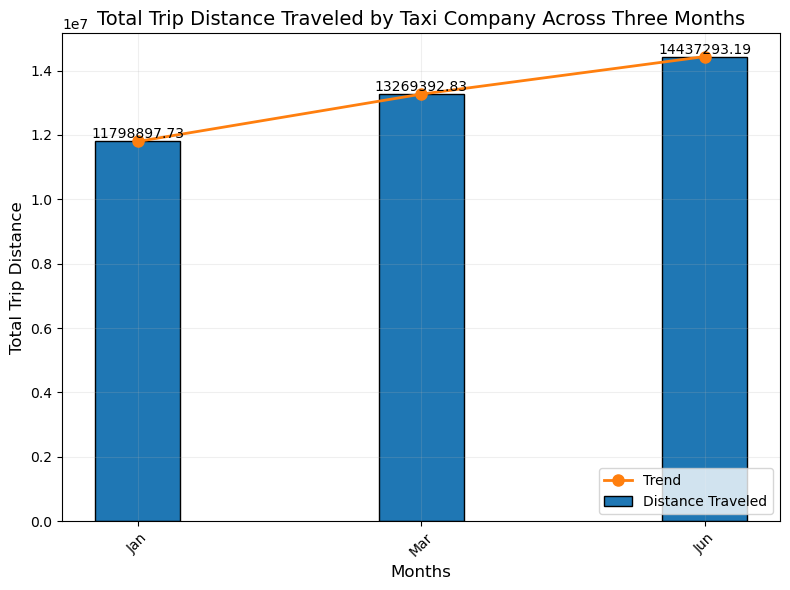

In [6]:
# Total Trip Distance Across Three Months

distance = df.groupby('Month')['trip_distance'].sum()
months=distance.index
value_3=distance.values

plt.figure(figsize=(8,6))
bars = plt.bar(months, value_3, color='#1f77b4', edgecolor='black', label='Distance Traveled', width=0.3)

# Displaying values on top of bars
for bar, value in zip(bars, value_3):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(value), ha='center', va='bottom', color='black', fontsize=10)
    
plt.plot(months, value_3, marker='o', color='#ff7f0e',linewidth=2,markersize=8, linestyle='-',label='Trend')


plt.xlabel('Months',fontsize=12)
plt.ylabel('Total Trip Distance',fontsize=12)
plt.title('Total Trip Distance Traveled by Taxi Company Across Three Months', fontsize=14)

plt.grid(True, linestyle='-',alpha=0.2)
plt.xticks(rotation=45)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show

Discussion: 
* Based on the three plot above, we can roughly guess the average total cost per trip peak in june and january being the lowest during these months. Additionally, the total cost/trip keeps increasing over time  
* The observation is proven by the total trip traveled plot which is the lowest at january and reaches its peak at june
* Interestingly, the total of passenger taken for ride reach its peak at March while January has the lowest amount of passenger being taken for ride




# Data Exploration

## Check for missing values in the dataset

In [7]:
df.isnull().sum()

VendorID                      0
datetime_pickup               0
datetime_dropoff              0
passenger_count          256208
trip_distance                 0
RatecodeID               256208
store_and_fwd_flag       256208
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     256208
airport_fee              256208
Month                         0
dtype: int64

In [8]:
# Find rows with null values in the specific column
inspect_null = df[pd.isnull(df['store_and_fwd_flag'])]

# Display the first row with null value in the specified column (if any)
inspect_null = inspect_null.head(5)

print("Example row with null value :")
print(inspect_null)


Example row with null value :
         VendorID     datetime_pickup    datetime_dropoff  passenger_count  \
2995023         1 2023-01-01 00:02:40 2023-01-01 00:30:36              NaN   
2995024         1 2023-01-01 00:57:48 2023-01-01 01:12:34              NaN   
2995025         2 2023-01-01 00:55:37 2023-01-01 01:00:41              NaN   
2995026         2 2023-01-01 00:43:47 2023-01-01 00:56:12              NaN   
2995027         2 2023-01-01 00:34:00 2023-01-01 00:51:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2995023           0.00         NaN               None           142   
2995024           0.00         NaN               None           237   
2995025           0.86         NaN               None            24   
2995026           5.36         NaN               None            88   
2995027           6.03         NaN               None           232   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amou

Upon inspecting the data, the empty data on passenger count is located at the same row as ratecodeid, store_and_fwd_flag, congestion_surcharge, and airport_fee.

Interestingly on this very same empty row, the total_amount for the trip is recorded. This indicated that the driver may forgot to enter the passenger_count since this is driver-entered value. Regarding the other result that has NaN Value, it will be treated as there's error when inputting the data since the author of the notebook has no further knowledge regarding the cause of the case.

Hence, there's no reason to remove the NaN Value here since we won't be analysing all the column with NaN or None value for now

In [9]:
# inspect row with total_amount =0
df_totalamount_0 = df[df['total_amount'] == 0]
df_totalamount_0

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month
3291,1,2023-01-01 00:11:55,2023-01-01 00:11:55,1.0,0.0,5.0,Y,137,264,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jan
23186,1,2023-01-01 07:23:50,2023-01-01 07:55:05,2.0,10.4,1.0,N,48,95,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jan
61780,1,2023-01-01 19:16:54,2023-01-01 19:17:15,1.0,0.0,2.0,N,261,261,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jan
61846,1,2023-01-01 19:24:33,2023-01-01 19:25:27,1.0,0.1,1.0,N,116,116,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jan
78670,1,2023-01-02 07:11:13,2023-01-02 07:12:11,1.0,0.0,1.0,N,48,48,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9727126,1,2023-06-15 16:43:14,2023-06-15 16:56:58,NaN,1.9,NaN,None,170,79,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Jun
9760503,1,2023-06-25 21:50:38,2023-06-25 21:50:51,NaN,0.0,NaN,None,43,43,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Jun
9760700,1,2023-06-25 22:19:26,2023-06-25 22:20:53,NaN,0.0,NaN,None,249,114,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Jun
9764024,1,2023-06-27 05:08:10,2023-06-27 05:16:55,NaN,1.7,NaN,None,186,50,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Jun


We will remove the column with negative value pr 0 value in total_amount for further analysis

In [10]:
# remove total_amount==0
df = df[df['total_amount'] != 0.0]

In [11]:
# inspect RateCodeID
unique_payment_types = df['RatecodeID'].unique()
unique_payment_typesg

array([ 1.,  2.,  4., 99.,  5.,  3.,  6., nan])

In [12]:
# inspect RateCodeID=99
code_99 = df[df['RatecodeID'] == 99.]
code_99

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month
329,1,2023-01-01 00:12:16,2023-01-01 00:26:14,1.0,4.4,99.0,N,74,248,2,24.5,0.0,0.5,0.0,6.55,1.0,32.55,0.0,0.0,Jan
4067,1,2023-01-01 00:34:52,2023-01-01 00:44:07,1.0,1.0,99.0,N,42,74,2,12.2,0.0,0.5,0.0,0.00,1.0,13.70,0.0,0.0,Jan
8744,1,2023-01-01 01:17:50,2023-01-01 02:02:32,1.0,11.5,99.0,N,188,219,2,45.5,0.0,0.5,0.0,0.00,1.0,47.00,0.0,0.0,Jan
9254,1,2023-01-01 01:51:10,2023-01-01 02:19:45,1.0,0.0,99.0,N,74,77,2,41.2,0.0,0.5,0.0,6.55,1.0,49.25,0.0,0.0,Jan
12769,1,2023-01-01 02:03:24,2023-01-01 03:04:37,1.0,22.0,99.0,N,86,5,2,67.2,0.0,0.5,0.0,9.00,1.0,77.70,0.0,0.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670580,1,2023-06-30 22:11:55,2023-06-30 22:50:50,1.0,7.6,99.0,N,41,254,2,35.5,0.0,0.5,0.0,0.00,1.0,37.00,0.0,0.0,Jun
9671465,1,2023-06-30 22:46:50,2023-06-30 23:33:55,1.0,13.2,99.0,N,55,37,2,45.5,0.0,0.5,0.0,0.00,1.0,47.00,0.0,0.0,Jun
9673654,1,2023-06-30 23:22:42,2023-06-30 23:39:06,1.0,0.0,99.0,N,90,232,2,18.2,0.0,0.5,0.0,0.00,1.0,19.70,0.0,0.0,Jun
9675877,1,2023-06-30 23:05:53,2023-06-30 23:29:05,1.0,0.0,99.0,N,48,88,2,18.2,0.0,0.5,0.0,0.00,1.0,19.70,0.0,0.0,Jun


it seems like RatecodeID with code=99 is an unique case that is not stated in the data dictionary. Since this result won't effect our further analysis, nothing will be changed here but it should be noted that there's special case here. 

In [13]:
# inspect nego ride
df_nego_5 = df[df['RatecodeID'] == 5.0]
df_nego_5

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month
442,2,2023-01-01 00:37:17,2023-01-01 00:38:51,1.0,0.00,5.0,N,255,264,2,40.0,0.0,0.0,8.20,0.0,1.0,49.20,0.0,0.0,Jan
613,1,2023-01-01 00:37:59,2023-01-01 00:38:15,1.0,5.30,5.0,N,237,237,2,10.0,0.0,0.0,4.00,0.0,1.0,15.00,0.0,0.0,Jan
953,2,2023-01-01 00:29:55,2023-01-01 00:29:57,3.0,0.00,5.0,N,41,264,2,10.0,0.0,0.5,3.45,0.0,1.0,14.95,0.0,0.0,Jan
1516,2,2023-01-01 00:22:44,2023-01-01 00:25:16,6.0,0.38,5.0,N,74,74,2,86.0,0.0,0.0,8.70,0.0,1.0,95.70,0.0,0.0,Jan
1621,2,2023-01-01 00:45:32,2023-01-01 00:45:35,0.0,0.00,5.0,N,232,232,3,16.0,0.0,0.0,0.00,0.0,1.0,17.00,0.0,0.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677237,2,2023-06-30 23:37:03,2023-06-30 23:37:15,4.0,0.00,5.0,N,39,39,2,52.0,0.0,0.0,2.00,0.0,1.0,55.00,0.0,0.0,Jun
9677371,2,2023-06-30 23:44:23,2023-06-30 23:50:03,1.0,4.22,5.0,N,226,65,2,138.5,0.0,0.0,27.90,0.0,1.0,167.40,0.0,0.0,Jun
9677438,2,2023-06-30 23:54:42,2023-06-30 23:54:46,1.0,0.00,5.0,N,196,264,2,10.0,0.0,0.0,0.00,0.0,1.0,11.00,0.0,0.0,Jun
9677765,2,2023-06-30 23:36:06,2023-06-30 23:36:26,1.0,0.00,5.0,N,164,164,2,9.1,0.0,0.0,3.78,0.0,1.0,16.38,2.5,0.0,Jun


No strange result here

In [14]:
# inspect payment type (find payment type value -1)
# inspect no charge payment type
df_pay_3 = df[df['payment_type'] == 3]
df_pay_3

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,3,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,Jan
9,2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,N,141,107,3,14.9,1.0,0.5,0.0,0.0,1.0,19.9,2.5,0.0,Jan
18,1,2023-01-01 00:03:36,2023-01-01 00:09:36,3.0,1.20,1.0,N,237,239,3,8.6,3.5,0.5,0.0,0.0,1.0,13.6,2.5,0.0,Jan
19,1,2023-01-01 00:15:23,2023-01-01 00:29:41,2.0,2.50,1.0,N,143,229,3,15.6,3.5,0.5,0.0,0.0,1.0,20.6,2.5,0.0,Jan
30,1,2023-01-01 00:31:30,2023-01-01 00:46:51,2.0,4.10,1.0,N,170,75,3,19.1,3.5,0.5,0.0,0.0,1.0,24.1,2.5,0.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677844,2,2023-06-30 23:57:19,2023-07-01 00:07:04,1.0,0.87,1.0,N,162,230,3,10.0,1.0,0.5,0.0,0.0,1.0,15.0,2.5,0.0,Jun
9677855,2,2023-06-30 23:07:40,2023-06-30 23:10:12,1.0,0.87,1.0,N,237,263,3,5.8,1.0,0.5,0.0,0.0,1.0,10.8,2.5,0.0,Jun
9677857,2,2023-06-30 23:24:50,2023-06-30 23:38:09,4.0,1.37,1.0,N,161,186,3,12.8,1.0,0.5,0.0,0.0,1.0,17.8,2.5,0.0,Jun
9677858,2,2023-06-30 23:46:21,2023-06-30 23:58:06,2.0,2.01,1.0,N,249,4,3,13.5,1.0,0.5,0.0,0.0,1.0,18.5,2.5,0.0,Jun


Upon personal research, no charge means the trip could be from promo, complimentary service, or reward. So no further action is needed here

In [15]:
# inspect trip with dispute
df_pay_4 = df[df['payment_type'] == 4]
df_pay_4

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month
298,1,2023-01-01 00:43:21,2023-01-01 01:06:11,1.0,3.50,1.0,N,142,107,4,21.9,3.5,0.5,0.0,0.0,1.0,26.9,2.5,0.0,Jan
333,1,2023-01-01 00:57:44,2023-01-01 00:57:59,1.0,0.00,1.0,N,137,137,4,3.0,3.5,0.5,0.0,0.0,1.0,8.0,2.5,0.0,Jan
726,1,2023-01-01 00:51:50,2023-01-01 01:01:10,1.0,1.40,1.0,N,142,141,4,9.3,3.5,0.5,0.0,0.0,1.0,14.3,2.5,0.0,Jan
803,1,2023-01-01 00:54:44,2023-01-01 01:13:06,1.0,5.90,1.0,N,231,161,4,26.1,3.5,0.5,0.0,0.0,1.0,31.1,2.5,0.0,Jan
882,1,2023-01-01 00:44:13,2023-01-01 01:12:31,2.0,3.60,1.0,N,48,113,4,22.6,3.5,0.5,0.0,0.0,1.0,27.6,2.5,0.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677319,2,2023-06-30 23:13:48,2023-06-30 23:24:37,1.0,2.30,1.0,N,237,234,4,13.5,1.0,0.5,0.0,0.0,1.0,18.5,2.5,0.0,Jun
9677561,2,2023-06-30 23:30:02,2023-06-30 23:56:53,1.0,6.42,1.0,N,125,238,4,32.4,-1.0,-0.5,0.0,0.0,-1.0,37.4,-2.5,0.0,Jun
9677562,2,2023-06-30 23:30:02,2023-06-30 23:56:53,1.0,6.42,1.0,N,125,238,4,32.4,1.0,0.5,0.0,0.0,1.0,37.4,2.5,0.0,Jun
9677619,1,2023-06-30 23:14:30,2023-06-30 23:20:43,1.0,0.90,1.0,N,162,164,4,6.5,3.5,0.5,0.0,0.0,1.0,11.5,2.5,0.0,Jun


Above dataset which address trip with disputes appears normal, except for few negative values among the cost including total_amount column. These negative values were modified for the purpose of analysis into positive values.

In [16]:
# inspect unknown trip
df_pay_5 = df[df['payment_type'] == 5]
df_pay_5

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month
22,1,2023-01-01 00:21:49,2023-01-01 00:29:15,4.0,0.80,1.0,N,163,161,5,8.6,3.5,0.5,0.0,0.0,1.0,13.6,2.5,0.0,Jan
23,1,2023-01-01 00:52:06,2023-01-01 01:02:18,2.0,1.70,1.0,N,161,164,5,11.4,3.5,0.5,0.0,0.0,1.0,16.4,2.5,0.0,Jan
132,2,2023-01-01 00:28:29,2023-01-01 00:31:03,1.0,0.42,1.0,N,233,229,5,5.1,-1.0,-0.5,0.0,0.0,-1.0,10.1,-2.5,0.0,Jan
133,2,2023-01-01 00:28:29,2023-01-01 00:31:03,1.0,0.42,1.0,N,233,229,5,5.1,1.0,0.5,0.0,0.0,1.0,10.1,2.5,0.0,Jan
263,2,2023-01-01 00:20:18,2023-01-01 00:27:56,2.0,1.19,1.0,N,142,50,5,9.3,-1.0,-0.5,0.0,0.0,-1.0,14.3,-2.5,0.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677468,1,2023-06-30 23:12:44,2023-06-30 23:30:02,1.0,3.80,1.0,N,50,13,5,19.8,3.5,0.5,0.0,0.0,1.0,24.8,2.5,0.0,Jun
9677534,2,2023-06-30 23:17:14,2023-06-30 23:38:11,1.0,3.61,1.0,N,237,68,5,21.2,-1.0,-0.5,0.0,0.0,-1.0,26.2,-2.5,0.0,Jun
9677535,2,2023-06-30 23:17:14,2023-06-30 23:38:11,1.0,3.61,1.0,N,237,68,5,21.2,1.0,0.5,0.0,0.0,1.0,26.2,2.5,0.0,Jun
9677580,2,2023-06-30 23:39:42,2023-07-01 00:16:08,1.0,6.71,1.0,N,45,227,5,38.0,-1.0,-0.5,0.0,0.0,-1.0,43.0,-2.5,0.0,Jun


Nothing particular weird happen in the data

In [17]:
# inspect trip with dispute
df_pay_6 = df[df['payment_type'] == 6]
df_pay_6

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month


No data for voided trip after clearing the data

# Column With Noise

Column 'fare_amount' and 'RatecodeID' is redundant for analysis. 'fare_amount' is redundant since it haven't been adjusted by 'RateCodeID' and which is already included in 'total_amount'. 

'RateCodeID' is also redundant since it doesn't specify any rate value.
'Airport_fee' is also redundant since pickup from JFK or LaGuardia Airport has been indicated in 'RateCodeID' for code 2

The columns 'Extra', 'MTA_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 'congestion_surcharge' are also redundant unless there's any analysis being done to them.

Regarding how many data with noise existing in the dataset would be too difficult to identify regarding this matter

# Correlation

In [18]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
VendorID,1.000000,0.100364,0.002339,-0.114468,-0.005655,-0.003926,0.016429,0.005585,-0.555029,-0.052157,0.043991,0.015438,-0.056404,0.007609,-0.016386,0.028042
passenger_count,0.100364,1.000000,0.003528,-0.026567,-0.013175,-0.007917,0.013862,0.006061,-0.054048,-0.006730,0.012827,0.026862,0.002227,0.007003,0.008989,0.017103
trip_distance,0.002339,0.003528,1.000000,0.008851,-0.002723,-0.002224,-0.005282,0.002867,0.001349,-0.001028,0.012363,0.013582,0.000198,0.003518,-0.032206,0.077942
RatecodeID,-0.114468,-0.026567,0.008851,1.000000,-0.043509,-0.034289,-0.029395,0.012461,-0.065104,-0.008967,-0.042861,0.069276,0.004499,0.010243,-0.216345,-0.006692
PULocationID,-0.005655,-0.013175,-0.002723,-0.043509,1.000000,0.087381,-0.016418,-0.017947,-0.033439,0.009621,-0.066513,-0.080990,0.006376,-0.021785,0.111461,-0.145086
DOLocationID,-0.003926,-0.007917,-0.002224,-0.034289,0.087381,1.000000,-0.019379,-0.014640,-0.005899,0.029010,-0.047289,-0.066776,0.007510,-0.016984,0.112431,-0.054109
payment_type,0.016429,0.013862,-0.005282,-0.029395,-0.016418,-0.019379,1.000000,-0.001209,-0.029443,-0.339149,-0.350029,-0.033216,-0.375258,-0.013086,-0.292805,0.002060
fare_amount,0.005585,0.006061,0.002867,0.012461,-0.017947,-0.014640,-0.001209,1.000000,0.018866,-0.018416,0.084926,0.088644,-0.000552,0.998851,-0.040321,0.082202
extra,-0.555029,-0.054048,0.001349,-0.065104,-0.033439,-0.005899,-0.029443,0.018866,1.000000,0.141101,0.183992,0.223518,0.135432,0.038096,0.056308,0.319294
mta_tax,-0.052157,-0.006730,-0.001028,-0.008967,0.009621,0.029010,-0.339149,-0.018416,0.141101,1.000000,0.001353,-0.097660,0.878544,-0.019373,0.551112,0.056149


Column with correlation would be:
* total_amount and fare_amount with correlation 0.9977
* improvement surcharge and mta_tax with correlation 0.8785

Total_amount is highly correlated with fare_amount makes sense since fare_amount adjusted by rate code added by other cost will sum to total_amount

Both MTA tax and improvement surcharge are additional fees that the passenger paid on top of fare_cost adjusted by rate. The reason that both of this parameter is highly correlated probably because both cost is almost similar and both trip is charged when the passenger board the taxi in New York City.

# Feature Indicating the trip is in rush-hour

We're going to define the trip is in rush-hour if the pickup time is between 7:00AM to 10:00AM and 4:00PM to 7:00PM

In [19]:
import pandas as pd

df['datetime_pickup'] = pd.to_datetime(df['datetime_pickup'])
df['Rush-Hour'] = df['datetime_pickup'].apply(lambda x: 'Y' if ((x.hour >= 7 and x.hour < 10) or (x.hour >= 16 and x.hour < 19)) else 'N')

# Display the DataFrame to verify the new column
df.head()


,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month,Rush-Hour
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,3,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Jan,N
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,2,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Jan,N
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,2,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Jan,N
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,2,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,Jan,N
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,2,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Jan,N


## Feature Indicating Complexity

In this part, it is a bit difficult since the available data is the distance betwen pickup location and drop location ID, which doesn't reflect the actual pickup and drop location of the taxi. Therefore, I believe 'complexity' might be redundant in our analysis

In [20]:
import geopandas as gpd

shapefile_path = "taxi_zones.shp"
taxi_zones = gpd.read_file("taxi_zones__7_/taxi_zones.shp")

# Extract "Latitude," and "Longitude" information
taxi_zones["Latitude"] = taxi_zones.geometry.centroid.y
taxi_zones["Longitude"] = taxi_zones.geometry.centroid.x
taxi_zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Latitude,Longitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",191376.749531,9.359968e+05
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",164018.754403,1.031086e+06
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",254265.478659,1.026453e+06
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",202959.782391,9.906340e+05
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",140681.351376,9.318714e+05
...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",266453.414552,1.025106e+06
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",210434.891894,1.010212e+06
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",197635.173702,9.806395e+05
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",221974.400788,9.990647e+05


In [21]:
# Merge taxi_zones latitude longitude with df based on PULocationID
merged_df_PU = df.merge(taxi_zones[['OBJECTID', 'Latitude', 'Longitude']], left_on='PULocationID', right_on='OBJECTID', suffixes=('', '_PU'))

In [22]:
# Merge taxi_zones with df based on DOLocationID
merged_df = merged_df_PU.merge(taxi_zones[['OBJECTID', 'Latitude', 'Longitude']], left_on='DOLocationID', right_on='OBJECTID', suffixes=('', '_DO'))
merged_df

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,Month,Rush-Hour,OBJECTID,Latitude,Longitude,OBJECTID_DO,Latitude_DO,Longitude_DO
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,3,...,2.5,0.00,Jan,N,161,215447.527224,9.904285e+05,141,218699.192727,9.954312e+05
1,2,2023-01-01 00:21:43,2023-01-01 00:27:52,1.0,2.00,1.0,N,161,141,3,...,2.5,0.00,Jan,N,161,215447.527224,9.904285e+05,141,218699.192727,9.954312e+05
2,2,2023-01-01 00:11:44,2023-01-01 00:20:38,2.0,1.83,1.0,N,161,141,2,...,2.5,0.00,Jan,N,161,215447.527224,9.904285e+05,141,218699.192727,9.954312e+05
3,2,2023-01-01 00:35:52,2023-01-01 00:43:38,2.0,1.41,1.0,N,161,141,3,...,2.5,0.00,Jan,N,161,215447.527224,9.904285e+05,141,218699.192727,9.954312e+05
4,1,2023-01-01 00:51:12,2023-01-01 00:59:38,1.0,1.80,1.0,N,161,141,3,...,2.5,0.00,Jan,N,161,215447.527224,9.904285e+05,141,218699.192727,9.954312e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607697,2,2023-06-19 14:32:28,2023-06-19 14:33:01,2.0,0.45,1.0,N,154,154,4,...,0.0,0.00,Jun,N,154,155545.396170,1.011302e+06,154,155545.396170,1.011302e+06
9607698,2,2023-06-19 14:32:28,2023-06-19 14:33:01,2.0,0.45,1.0,N,154,154,4,...,0.0,0.00,Jun,N,154,155545.396170,1.011302e+06,154,155545.396170,1.011302e+06
9607699,2,2023-06-25 16:07:14,2023-06-25 16:07:39,1.0,0.10,1.0,N,154,154,4,...,0.0,0.00,Jun,Y,154,155545.396170,1.011302e+06,154,155545.396170,1.011302e+06
9607700,2,2023-06-25 16:07:14,2023-06-25 16:07:39,1.0,0.10,1.0,N,154,154,4,...,0.0,0.00,Jun,Y,154,155545.396170,1.011302e+06,154,155545.396170,1.011302e+06


In [23]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c  # Distance in kilometers
    return distance

# Calculate distance between pickup and dropoff points
merged_df['Straight Distance'] = merged_df.apply(lambda row: haversine(row['Latitude'], row['Longitude'], row['Latitude_DO'], row['Longitude_DO']), axis=1)

In [24]:
merged_df['Complexity'] = merged_df['trip_distance']/(merged_df['Straight Distance']*0.621371)
merged_df['Complexity']

0          0.000362
1          0.000746
2          0.000683
3          0.000526
4          0.000671
             ...   
9607697         inf
9607698         inf
9607699         inf
9607700         inf
9607701    0.006335
Name: Complexity, Length: 9607702, dtype: float64

Turns out after quick glance, the value couldn't really explain anything at all since the value is so small. Some value give an inf value due to NaN value since they didn't input the trip_distance

In [25]:
merged_df.drop(columns=['OBJECTID','Latitude', 'Longitude', 'OBJECTID_DO','Latitude_DO', 'Longitude_DO'], inplace=True)

In [26]:
merged_df

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month,Rush-Hour,Straight Distance,Complexity
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,3,...,0.00,0.0,1.0,14.30,2.5,0.00,Jan,N,4314.026932,0.000362
1,2,2023-01-01 00:21:43,2023-01-01 00:27:52,1.0,2.00,1.0,N,161,141,3,...,0.00,0.0,1.0,15.00,2.5,0.00,Jan,N,4314.026932,0.000746
2,2,2023-01-01 00:11:44,2023-01-01 00:20:38,2.0,1.83,1.0,N,161,141,2,...,1.64,0.0,1.0,18.04,2.5,0.00,Jan,N,4314.026932,0.000683
3,2,2023-01-01 00:35:52,2023-01-01 00:43:38,2.0,1.41,1.0,N,161,141,3,...,0.00,0.0,1.0,15.00,2.5,0.00,Jan,N,4314.026932,0.000526
4,1,2023-01-01 00:51:12,2023-01-01 00:59:38,1.0,1.80,1.0,N,161,141,3,...,0.00,0.0,1.0,15.00,2.5,0.00,Jan,N,4314.026932,0.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607697,2,2023-06-19 14:32:28,2023-06-19 14:33:01,2.0,0.45,1.0,N,154,154,4,...,0.00,0.0,-1.0,5.90,0.0,0.00,Jun,N,0.000000,inf
9607698,2,2023-06-19 14:32:28,2023-06-19 14:33:01,2.0,0.45,1.0,N,154,154,4,...,0.00,0.0,1.0,5.90,0.0,0.00,Jun,N,0.000000,inf
9607699,2,2023-06-25 16:07:14,2023-06-25 16:07:39,1.0,0.10,1.0,N,154,154,4,...,0.00,0.0,-1.0,4.50,0.0,0.00,Jun,Y,0.000000,inf
9607700,2,2023-06-25 16:07:14,2023-06-25 16:07:39,1.0,0.10,1.0,N,154,154,4,...,0.00,0.0,1.0,4.50,0.0,0.00,Jun,Y,0.000000,inf


## Pickup & Dropoff Frequency

In [27]:
# Calculate pickup frequencies
pickup_freq = df['PULocationID'].value_counts()

# Calculate dropoff frequencies
dropoff_freq = df['DOLocationID'].value_counts()

# If you want to reset the index and rename the columns
pickup_freq_df = pickup_freq.reset_index()
pickup_freq_df.columns = ['PULocationID', 'Pick-up Frequency']

dropoff_freq_df = dropoff_freq.reset_index()
dropoff_freq_df.columns = ['DOLocationID', 'Drop-off Frequency']

# Example usage to display pickup and dropoff frequencies
print("Pickup Frequencies:")
print(pickup_freq_df)

print("\nDropoff Frequencies:")
print(dropoff_freq_df)


Pickup Frequencies:
     PULocationID  Pick-up Frequency
0             132             510211
1             237             457675
2             161             447686
3             236             414163
4             162             347439
..            ...                ...
256           204                  7
257           199                  5
258            84                  4
259           176                  3
260            27                  3

[261 rows x 2 columns]

Dropoff Frequencies:
     DOLocationID  Drop-off Frequency
0             236              437262
1             237              408411
2             161              376319
3             230              296281
4             170              290352
..            ...                 ...
256           187                  63
257           204                  43
258             2                  34
259            99                  15
260           105                   1

[261 rows x 2 columns]


## Vendor by Popularity

We will rank vendor by its popularity based on how many trip they have done

Also in this part, we identified a vendor with code=6, we will remove this data in the beginning of the notebook

In [28]:
vendor_count = df['VendorID'].value_counts()
vendor_mapping = {
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
}

# Reset index and rename columns for clarity
vendor_pop = vendor_count.reset_index()
vendor_pop.columns = ['VendorID', 'TripCount']

# Sort the DataFrame by TripCount in descending order to rank vendors
vendor_pop = vendor_pop.sort_values(by='TripCount', ascending=False)
vendor_pop['VendorID'] = vendor_pop['VendorID'].map(vendor_mapping)

# Print the ranked vendor popularity
print(vendor_pop)

                            VendorID  TripCount
0                      VeriFone Inc.    7130879
1  Creative Mobile Technologies, LLC    2642239


## Peak Travel Hours

First, i will categorize the time based on time intervals to make the analysis easier.

1. Early Morning: Typically from 12:00 AM to 6:00 AM.
2. Morning: Usually from 6:00 AM to 10:00 AM.
3. Noon: From 10:00 AM to 2:00 PM.
4. Afternoon: From 2:00 PM to 6:00 PM.
5. Evening: From 6:00 PM to 10:00 PM.
6. Night: From 10:00 PM to 12:00 AM.

In [29]:
# First, define the function of time
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 14:
        return 'Noon'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

In [30]:
df_copy=df

In [31]:
df_copy['pickup_hour'] = pd.to_datetime(df['datetime_pickup']).dt.hour
df_copy['TimeCategory'] = df_copy['pickup_hour'].apply(categorize_time)

time_order= ['Early Morning','Morning','Noon','Afternoon','Evening','Night']
df_copy['TimeCategory'] = pd.Categorical(df_copy['TimeCategory'], categories=time_order, ordered=True)

# Counting no. trips in each time category
peak_hours_count = df_copy['TimeCategory'].value_counts()

peak_hours_count = peak_hours_count.reset_index()
peak_hours_count.columns = ['TimeCategory', 'TripCount']
peak_hours_count = peak_hours_count.sort_values(by='TripCount', ascending=False)

# Print the ranked peak travel hours
print("Ranked Peak Travel Hours:")
print(peak_hours_count)

Ranked Peak Travel Hours:
    TimeCategory  TripCount
0      Afternoon    2456879
1        Evening    2397509
2           Noon    2026179
3        Morning    1201111
4          Night     908087
5  Early Morning     783353


Based on the data, we can roughly guess the peak hours would be around 2pm-6pm in afternoon followed by 6pm-10pm at evening

# Average Distance Trip (Weekdays & Weekend)

Weekday : Monday to Friday
Weekend : Saturday, Sunday

In [32]:
import numpy as np

# Extract the day of the week 
df_copy['day_of_week'] = df['datetime_pickup'].dt.dayofweek

# Categorize trips as weekday (0 to 4) or weekend (5 and 6)
df_copy['weekend'] = df_copy['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

#Filter trip
filtered_weekday = df_copy[(df_copy['weekend'] == 0) & (df_copy['trip_distance'] > 0) & (~np.isnan(df_copy['trip_distance']))]
filtered_weekend = df_copy[(df_copy['weekend'] == 1) & (df_copy['trip_distance'] > 0) & (~np.isnan(df_copy['trip_distance']))]

# Average Trip
avg_weekday = filtered_weekday['trip_distance'].mean()
avg_weekend = filtered_weekend['trip_distance'].mean()

print("Average Trip Distance on Weekdays (miles):", avg_weekday)
print("Average Trip Distance on Weekends (miles):", avg_weekend)

Average Trip Distance on Weekdays (miles): 4.09990764021114
Average Trip Distance on Weekends (miles): 4.1047301569662595


It doesn't seems there's any significant difference in trip distance on weekdays and weekend

## Average No Passenger (Weekdays & Weekend)

In [33]:
#Filter passenger
filtered_weekday_2 = df_copy[(df_copy['weekend'] == 0) & (df_copy['passenger_count'] > 0) & (~np.isnan(df_copy['passenger_count']))]
filtered_weekend_2 = df_copy[(df_copy['weekend'] == 1) & (df_copy['passenger_count'] > 0) & (~np.isnan(df_copy['passenger_count']))]

# Average Trip
avg_pass_weekday = filtered_weekday_2['passenger_count'].mean()
avg_pass_weekend = filtered_weekend_2['passenger_count'].mean()

print("Average Passenger Count on Weekdays:", avg_pass_weekday)
print("Average Passenger Count on Weekends:", avg_pass_weekend)

Average Passenger Count on Weekdays: 1.353952039210443
Average Passenger Count on Weekends: 1.4717245095193312


In [34]:
from scipy.stats import ttest_ind

trip_weekday = filtered_weekday['trip_distance']
trip_weekend = filtered_weekend['trip_distance']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(trip_weekday, trip_weekend)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: -0.029224871205184952
P-Value: 0.9766852459551172


The average number of passenger on weekends is slightly higher compared on weekdays. However, statistically the difference is not significant and can be ignored

## Correlation between Fare_amount and tip_amount

First, we will create a special dataset for this case. The dataset will have fare_amount>0 and no NaN value, the passenger count will have value>0 and no NaN value as well.

In [35]:
filtered_df = df[(df['fare_amount'] > 0) & (~np.isnan(df['fare_amount'])) &
                 (df['passenger_count'] > 0) & (~np.isnan(df['passenger_count']))].copy()


In [36]:
filtered_df

,VendorID,datetime_pickup,datetime_dropoff,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Month,Rush-Hour,pickup_hour,TimeCategory,day_of_week,weekend
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,3,...,1.0,14.30,2.5,0.00,Jan,N,0,Early Morning,6,1
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,2,...,1.0,16.90,2.5,0.00,Jan,N,0,Early Morning,6,1
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,2,...,1.0,34.90,2.5,0.00,Jan,N,0,Early Morning,6,1
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,2,...,1.0,19.68,2.5,0.00,Jan,N,0,Early Morning,6,1
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,2,...,1.0,27.80,2.5,0.00,Jan,N,0,Early Morning,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677874,2,2023-06-30 23:37:53,2023-06-30 23:51:14,2.0,1.58,1.0,N,230,162,2,...,1.0,21.36,2.5,0.00,Jun,N,23,Night,4,0
9677875,2,2023-06-30 23:54:47,2023-07-01 00:07:19,2.0,1.47,1.0,N,162,48,3,...,1.0,17.80,2.5,0.00,Jun,N,23,Night,4,0
9677876,1,2023-06-30 23:47:32,2023-07-01 00:06:45,1.0,3.30,1.0,N,249,143,2,...,1.0,23.70,2.5,0.00,Jun,N,23,Night,4,0
9677877,2,2023-06-30 23:04:54,2023-06-30 23:30:59,1.0,10.59,1.0,N,132,39,2,...,1.0,52.15,0.0,1.75,Jun,N,23,Night,4,0


In [37]:
corr_1=filtered_df['fare_amount'].corr(filtered_df['tip_amount'])
print("Correlation between fare and tip:", corr_1)

Correlation between fare and tip: 0.08375917834779434


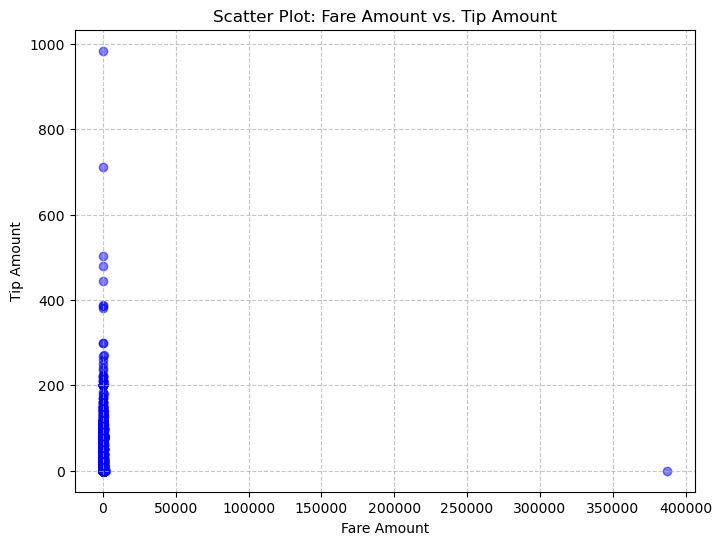

In [38]:
import matplotlib.pyplot as plt

# Create a DataFrame excluding rows with NaN values in 'fare_amount' and 'tip_amount'
filtered_data = df.dropna(subset=['fare_amount', 'tip_amount'])

# Extract 'fare_amount' and 'tip_amount' columns
fare_amount = filtered_data['fare_amount']
tip_amount = filtered_data['tip_amount']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fare_amount, tip_amount, color='blue', alpha=0.5)
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.title('Scatter Plot: Fare Amount vs. Tip Amount')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


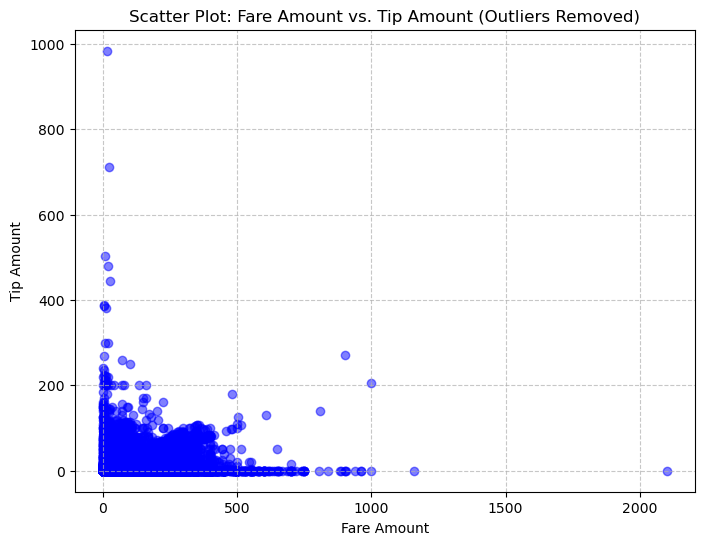

In [39]:
# Remove outliers where fare_amount is above 50000
filtered_data = filtered_data[filtered_data['fare_amount'] <= 50000]

# Create a scatter plot without outliers
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['fare_amount'], filtered_data['tip_amount'], color='blue', alpha=0.5)
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.title('Scatter Plot: Fare Amount vs. Tip Amount (Outliers Removed)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Although the correlation between fare amount and tips amount is very low in our case, graphically we can see that passenger tends to give tips more often if their fare is lower. Interestingly, some fare amount with cost close to 0 have a very high tips. This might be due to some error on the system so the customer pay in tips or some special unknown case.

In [40]:
corr_2=filtered_df['fare_amount'].corr(filtered_df['passenger_count'])
print("Correlation between fare and passenger_count:", corr_2)

Correlation between fare and passenger_count: 0.005661637084685299


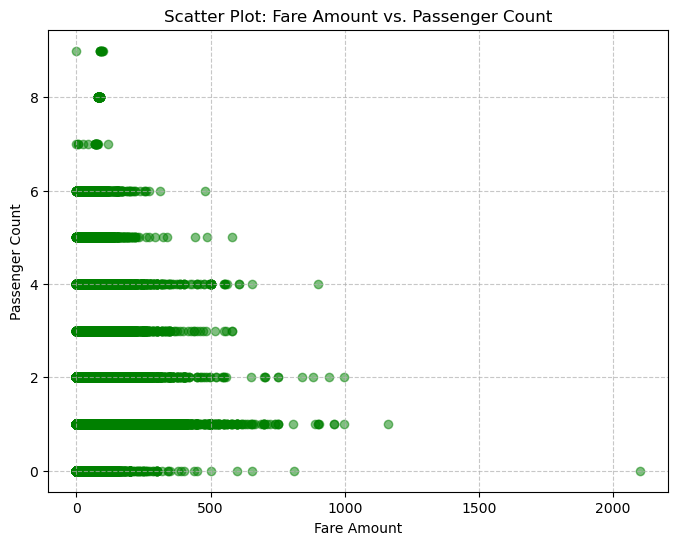

In [41]:
import matplotlib.pyplot as plt

# Create a scatter plot between 'fare_amount' and 'passenger_count'
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['fare_amount'], filtered_data['passenger_count'], color='green', alpha=0.5)
plt.xlabel('Fare Amount')
plt.ylabel('Passenger Count')
plt.title('Scatter Plot: Fare Amount vs. Passenger Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


While the correlation between fare amount and passenger count is very low, graphically we can see higher passenger count tends to have lower fare amount. It should be noted that some of the trip doesn't record any passenger due to driver didn't input any value.

# Extra Analysis (For personal use)

In [55]:
# Create a new dataset for new analysis
df_a=df_copy
df_a['datetime_pickup'] = pd.to_datetime(df_a['datetime_pickup'])
df_a['datetime_dropoff'] = pd.to_datetime(df_a['datetime_dropoff'])

# Calculate time difference in seconds between dropoff and pickup times
df_a['time_difference'] = (df_a['datetime_dropoff'] - df_a['datetime_pickup']).dt.total_seconds()
df_a = df_a[df_a['time_difference'] >0]

# Create new subset called 'Trip Speed' column by dividing 'trip_distance' by 'time_difference' (converted to hours for speed in miles per hour)
df_a['Trip_Speed'] = df_a['trip_distance'] / (df_a['time_difference'] / 3600)  # dividing by 3600 to convert seconds to hours
#Speed is in miles/hour
# drop-off unreasonable speed
df_a = df_a[df_a['Trip_Speed'] <= 120]

C:\Users\Maverick\AppData\Local\Temp\ipykernel_12560\3421863316.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Trip_Speed'] = df_a['trip_distance'] / (df_a['time_difference'] / 3600)  # dividing by 3600 to convert seconds to hours


In [56]:
df_a= df_a.dropna(subset=['Trip_Speed', 'total_amount']) #drop dataset with NaN value on specified subset

In [57]:
df_a.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,day_of_week,weekend,time_difference,Trip_Speed
VendorID,1.000000,0.100162,0.036286,-0.114345,-0.005767,-0.003415,0.005598,-0.555281,-0.053044,0.043619,0.015440,-0.056521,0.007601,-0.017314,0.028251,0.012176,0.015743,0.017929,0.016215,0.070219
passenger_count,0.100162,1.000000,0.033744,-0.026341,-0.013209,-0.007868,0.006047,-0.054019,-0.006843,0.012708,0.026848,0.002153,0.006984,0.008849,0.017127,0.016827,0.049932,0.056620,0.021552,0.016220
trip_distance,0.036286,0.033744,1.000000,0.073314,-0.131605,-0.101203,0.131949,0.164347,-0.049782,0.579342,0.636336,0.012768,0.163639,-0.250525,0.640275,-0.007175,0.006719,0.015323,0.243014,0.711495
RatecodeID,-0.114345,-0.026341,0.073314,1.000000,-0.043808,-0.034598,0.012360,-0.064978,-0.008060,-0.042973,0.069469,0.005301,0.010151,-0.216156,-0.006639,-0.037992,-0.018712,-0.021711,0.041184,0.000502
PULocationID,-0.005767,-0.013209,-0.131605,-0.043808,1.000000,0.087001,-0.017980,-0.033415,0.009737,-0.066765,-0.081093,0.006510,-0.021822,0.111600,-0.145083,0.012787,-0.031024,-0.035169,-0.034835,-0.107465
DOLocationID,-0.003415,-0.007868,-0.101203,-0.034598,0.087001,1.000000,-0.014696,-0.006111,0.029426,-0.047255,-0.066886,0.007789,-0.017033,0.113039,-0.054185,0.025038,-0.028484,-0.029097,-0.031180,-0.081025
fare_amount,0.005598,0.006047,0.131949,0.012360,-0.017980,-0.014696,1.000000,0.018939,-0.018192,0.084879,0.088670,-0.000471,0.998853,-0.040173,0.082207,-0.000905,-0.000588,-0.000205,0.035691,0.082521
extra,-0.555281,-0.054019,0.164347,-0.064978,-0.033415,-0.006111,0.018939,1.000000,0.140758,0.184754,0.223750,0.135281,0.038179,0.055933,0.319331,0.187661,-0.111359,-0.151737,0.030616,0.163266
mta_tax,-0.053044,-0.006843,-0.049782,-0.008060,0.009737,0.029426,-0.018192,0.140758,1.000000,0.001946,-0.097985,0.879658,-0.019158,0.550792,0.056242,0.013964,-0.005672,-0.006423,-0.000014,-0.020705
tip_amount,0.043619,0.012708,0.579342,-0.042973,-0.066765,-0.047255,0.084879,0.184754,0.001946,1.000000,0.465731,0.078464,0.127375,-0.046882,0.395886,0.026931,-0.010731,-0.014406,0.143392,0.391302


TimeCategory
Early Morning    25.754745
Morning          20.884419
Noon             11.476917
Afternoon        13.594738
Evening          14.256801
Night            15.681297
Name: Trip_Speed, dtype: float64


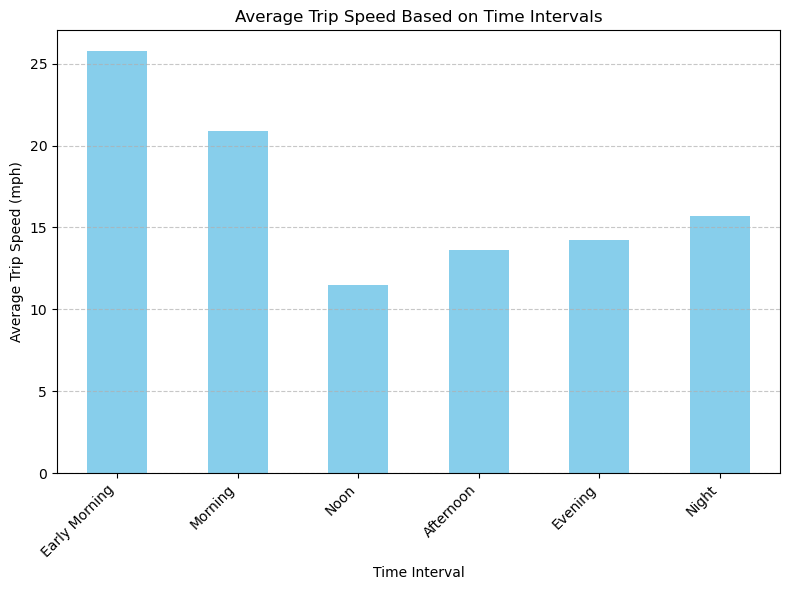

In [47]:
import matplotlib.pyplot as plt

# Calculate average trip speed for each time period
avg_trip_speed = df_a.groupby('TimeCategory')['Trip_Speed'].mean()
print(avg_trip_speed)

# Create a bar chart
plt.figure(figsize=(8, 6))
avg_trip_speed.plot(kind='bar', color='skyblue')
plt.xlabel('Time Interval')
plt.ylabel('Average Trip Speed (mph)')
plt.title('Average Trip Speed Based on Time Intervals')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Trip Speed has quite high positive correlation with trip_distance, airport_fee, tip_amount, and tolls_amount

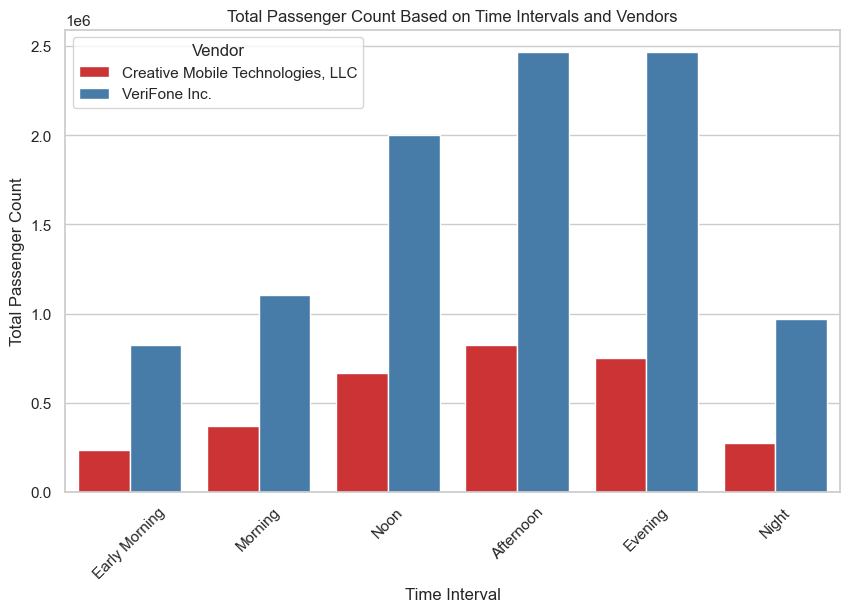

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping dictionary for VendorID labels
vendor_labels = {
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.',
    # Add more VendorID labels as needed
}

df_copy['Vendor Label'] = df_copy['VendorID'].map(vendor_labels)
pass_count = df_copy.groupby(['Vendor Label', 'TimeCategory'])['passenger_count'].sum().reset_index()

# Set style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", len(pass_count['Vendor Label'].unique()))

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TimeCategory', y='passenger_count', hue='Vendor Label', data=pass_count, palette=palette)
plt.xlabel('Time Interval')
plt.ylabel('Total Passenger Count')
plt.title('Total Passenger Count Based on Time Intervals and Vendors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Vendor')
plt.show()


From barchart above, VeriFone Inc is doing better than Creative Mobile Technologies, LLC since VeriFone got more passenger compared to Creative Mobile Technologies. Also it seems that for both companies, most people are looking for ride in afternoon to evening time frame (2pm-10pm) with early morning and night time having the lowest demand.

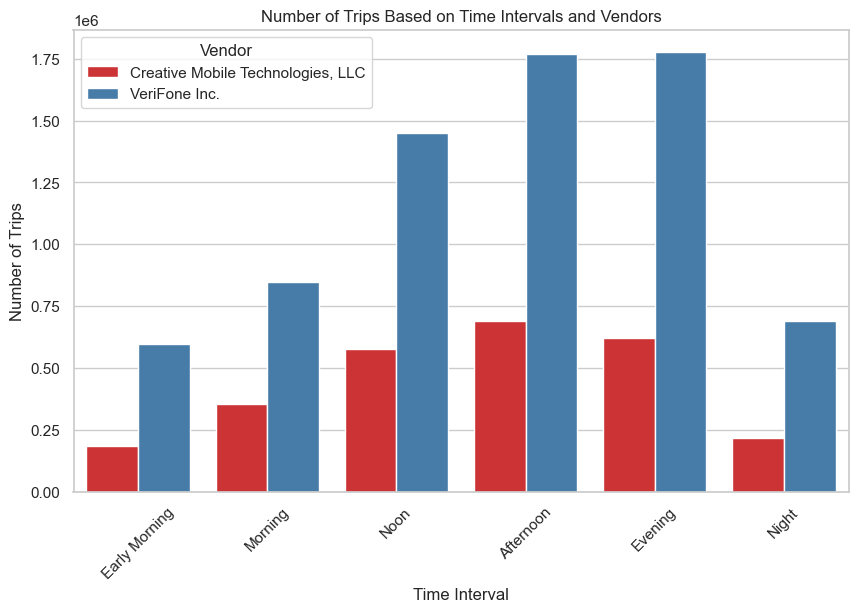

In [49]:
# Grouping by 'Vendor Label' and 'Time Interval', then counting the number of trips
trip_count = df_copy.groupby(['Vendor Label', 'TimeCategory']).size().reset_index(name='Number of Trips')

# Set style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", len(trip_count['Vendor Label'].unique()))

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TimeCategory', y='Number of Trips', hue='Vendor Label', data=trip_count, palette=palette)
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Based on Time Intervals and Vendors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Vendor')
plt.show()


Based on trip count, the amount of trip happens mostly around afternoon to evening (2pm-10pm). This result is unsurprising since the result is supported by the previous graph. We can also draw conclusion that Verifone Inc does more trip compared to Creative Mobile Technologies.

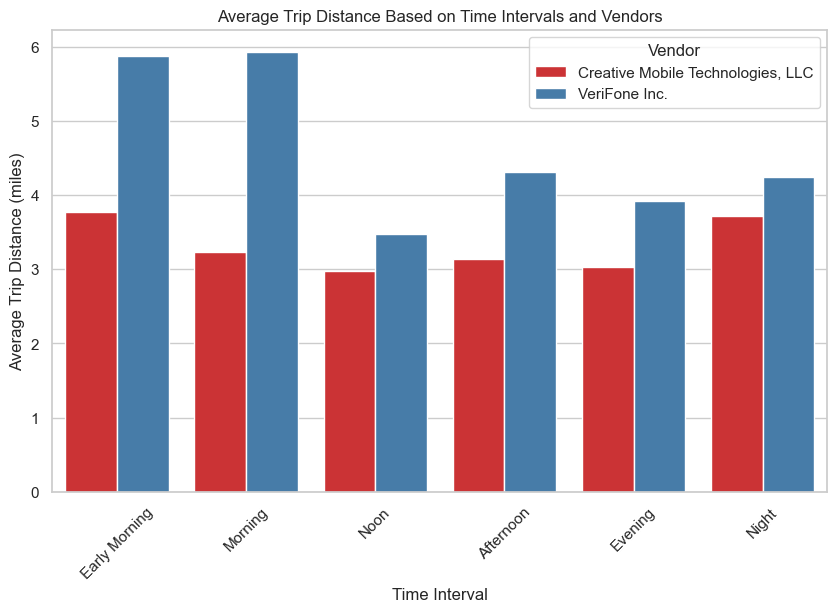

In [50]:
# Calculate average trip distance grouped by Vendor Label and Time Interval
avg_trip_distance = df_copy.groupby(['Vendor Label', 'TimeCategory'])['trip_distance'].mean().reset_index()

# Set style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", len(avg_trip_distance['Vendor Label'].unique()))

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TimeCategory', y='trip_distance', hue='Vendor Label', data=avg_trip_distance, palette=palette)
plt.xlabel('Time Interval')
plt.ylabel('Average Trip Distance (miles)')
plt.title('Average Trip Distance Based on Time Intervals and Vendors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Vendor')
plt.show()


Based on  trip distance graph above, the average trip distance in early morning to morning time interval (0am-10am) is 1-2 miles longer compared to usual distance.

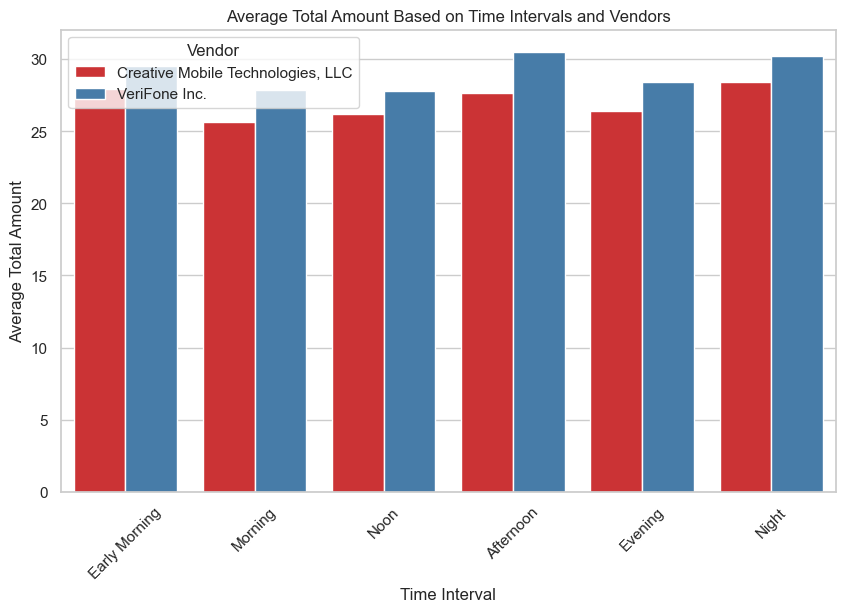

In [51]:
# Grouping by 'Vendor Label' and 'Time Interval', then calculating the average total_amount
average_total_amount = df_copy.groupby(['Vendor Label', 'TimeCategory'])['total_amount'].mean().reset_index()

# Set style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", len(average_total_amount['Vendor Label'].unique()))

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TimeCategory', y='total_amount', hue='Vendor Label', data=average_total_amount, palette=palette)
plt.xlabel('Time Interval')
plt.ylabel('Average Total Amount')
plt.title('Average Total Amount Based on Time Intervals and Vendors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Vendor')
plt.show()


Surprisingly, although the difference in the number of trip and passenger count across time intervals, there's no significant disparity in the earnings between time periods. The highest earnings are being in the afternoon followed by night time, while morning to noon period has the lowest total earnings from trips. Both company shows similar result with Verifone Inc doing better compared to Creative Mobile Technologies.

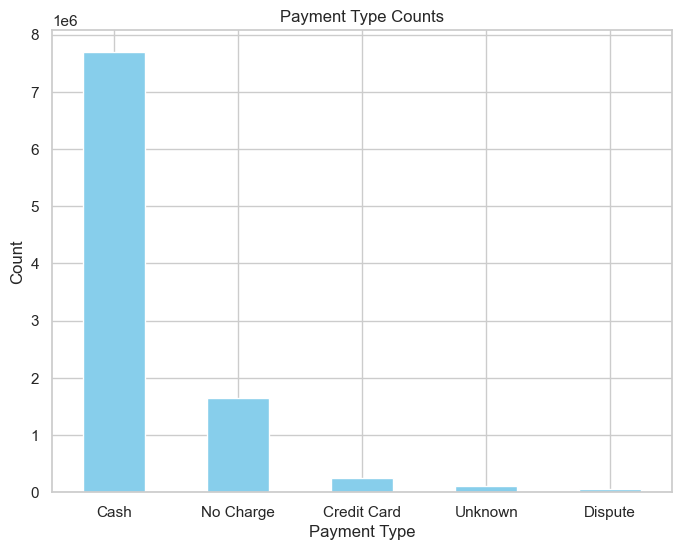

In [52]:
import matplotlib.pyplot as plt

payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
df_copy['payment_type'] = df_copy['payment_type'].map(payment_type_mapping)
payment_counts = df_copy['payment_type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment Type Counts')
plt.xticks(rotation=0)
plt.show()


From the payment type graph above, most passenger still paying for the trip using cash. There's also a quite high amount of trip that is classified as 'no charge'.

In [60]:
# Group the dataset by time interval and pickup location ID, then count the number of pickups
pickup_counts = df_copy.groupby(['TimeCategory', 'PULocationID']).size().reset_index(name='Pickup Count')

# Function to get top 5 pickup areas for each time interval
def get_top_pickup_areas(time_interval):
    top_areas = pickup_counts[pickup_counts['TimeCategory'] == time_interval]
    top_areas = top_areas.sort_values(by='Pickup Count', ascending=False).head(5)
    return top_areas

# List of unique time intervals
time_intervals = df_copy['TimeCategory'].unique()

# Create and display separate tables for top 5 pickup areas in each time interval
for time_interval in time_intervals:
    top_areas = get_top_pickup_areas(time_interval)
    print(f"Top 5 Pickup Areas for Time Interval {time_interval}:")
    display(top_areas)
    print("\n" + "="*50 + "\n")


Top 5 Pickup Areas for Time Interval Early Morning:


,TimeCategory,PULocationID,Pickup Count
78,Early Morning,79,67757
244,Early Morning,249,49204
127,Early Morning,132,46324
143,Early Morning,148,43211
47,Early Morning,48,41251




Top 5 Pickup Areas for Time Interval Night:


,TimeCategory,PULocationID,Pickup Count
1432,Night,132,70437
1530,Night,230,41786
1442,Night,142,40032
1383,Night,79,39768
1461,Night,161,38421




Top 5 Pickup Areas for Time Interval Afternoon:


,TimeCategory,PULocationID,Pickup Count
1015,Afternoon,237,137139
939,Afternoon,161,136904
910,Afternoon,132,133271
1014,Afternoon,236,127970
940,Afternoon,162,93029




Top 5 Pickup Areas for Time Interval Evening:


,TimeCategory,PULocationID,Pickup Count
1200,Evening,161,131122
1171,Evening,132,126606
1276,Evening,237,111244
1201,Evening,162,97541
1269,Evening,230,89087




Top 5 Pickup Areas for Time Interval Morning:


,TimeCategory,PULocationID,Pickup Count
492,Morning,236,69463
442,Morning,186,64054
388,Morning,132,61494
493,Morning,237,55577
418,Morning,162,45491




Top 5 Pickup Areas for Time Interval Noon:


,TimeCategory,PULocationID,Pickup Count
754,Noon,237,116411
753,Noon,236,114029
678,Noon,161,94591
655,Noon,138,75295
679,Noon,162,74949


# Conclusion

In [ ]:
Task 5: Conclusion (6 points) 
1. Summarize the key findings from your data analysis. 
2. Reflect on any challenges you faced during the analysis. 
3. Suggest possible next steps or additional analyses that could be performed. 

## Summarize:

* Both companies (VeriFone Inc. and Creative Mobile Technologies) are performing well with VeriFone Inc. being the leading companies in number of trip and earnings

* Since there is high demand between afternoon and evening time period (2pm-10pm), both companies can considered expanding their service in this timeframe to meet the high demand. Also different charging rate could be implemented to adjust for low availability services such as surcharges during peak hour or in high-demand areas. The top 5 pickup areas table can be used for reference.

* Despite clear difference in demand across time period, the earnings of both companies across the time difference doesn't show significant difference graphically. Different pricing strategies may be implemented for areas with high demand such as: higher rate at areas (PULocationID) with high demands, higher pricing at peak hours.

* Since trip in the early morning and morning tend to be longer compared to usual and the trip speed is higher (potentially due to people going to airport).Implement a fixed-rate pricing scheme could enhance the customer satisfaction and simplify transactions.

* There's still a high amount of passenger paying using cash, despite the convenience of using digital payments. As it is generally preferable to use a digital payment to prevent any potential loss. It is suggested to implement a promotional offers to encourage customer to pay using online payments or credit card.

## Challenge:

* mainly data cleaning, since you get a lot of strange an unexpected result which after further investigation is due to noise or error in the data
* uncomplete data for better analysis results and findings

## Next-Steps?

* Adding actual straight distant between trips can potentially calculate the complexity of the trips. Which can be an added information for pricing strategies.

* Information regarding customer satisfaction couldn't be found. This would be important in any future analysis in age of fierce competition between company in same industry